In [58]:
import numpy as np

In [59]:
import pandas as pd

In [60]:
import matplotlib.pyplot as plt

In [61]:
import shapely.geometry

In [62]:
import shapely.wkt

In [63]:
import geopandas as gpd

In [64]:
import rasterio

In [65]:
from rasterio.plot import show

In [66]:
import rasterstats

In [67]:
islands = gpd.read_file('ne_10m_minor_islands_coastline.shp', encoding='utf-8')
islands

,featurecla,min_zoom,scalerank,geometry
0,Minor coastline,6.5,7,"LINESTRING (168.20460 -76.06341, 168.28175 -76..."
1,Minor coastline,6.5,7,"LINESTRING (-68.70861 -56.52345, -68.70954 -56..."
2,Minor coastline,6.5,7,"LINESTRING (-68.70360 -56.51442, -68.71105 -56..."
3,Minor coastline,6.5,8,"LINESTRING (-59.20238 -52.90244, -59.19591 -52..."
4,Minor coastline,7.0,8,"LINESTRING (-74.53359 -52.45612, -74.50559 -52..."
...,...,...,...,...
2736,Minor coastline,7.0,8,"LINESTRING (172.05644 -22.39463, 172.05433 -22..."
2737,Minor coastline,7.0,8,"LINESTRING (171.34060 -22.34476, 171.33902 -22..."
2738,Minor coastline,7.0,8,"LINESTRING (117.75389 15.15437, 117.75186 15.1..."
2739,Minor coastline,6.5,7,"LINESTRING (43.14024 12.72015, 43.13857 12.718..."


In [68]:
islands.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

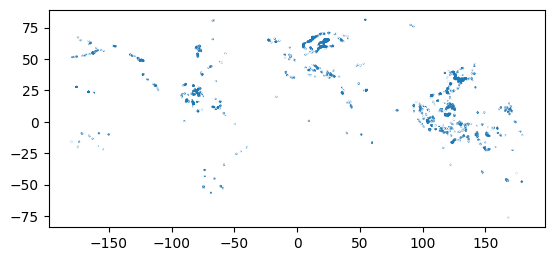

In [69]:
islands.plot();

Exercise 1: Use the scalerank column for an attribute-specific mapping, to show the colorbar you need, legend=True, add title and x and y label, in adition try to add a title to your colorbar.

Text(35.597222222222214, 0.5, 'Latitude')

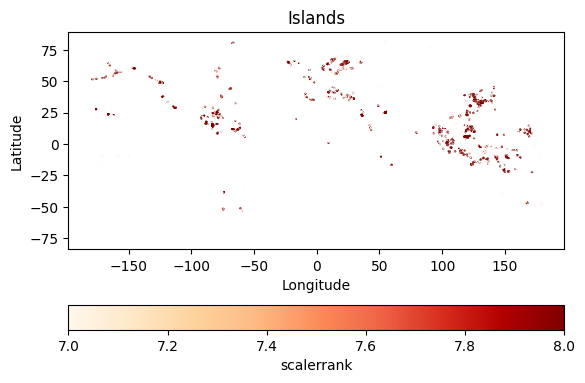

In [70]:
islands.plot(column="scalerank", legend = True, legend_kwds={"label": "scalerrank", "orientation": "horizontal"}, cmap='OrRd');
plt.title("Islands");
plt.xlabel("Longitude");
plt.ylabel("Latitude")
#cmap='OrRd' ist die Farbe

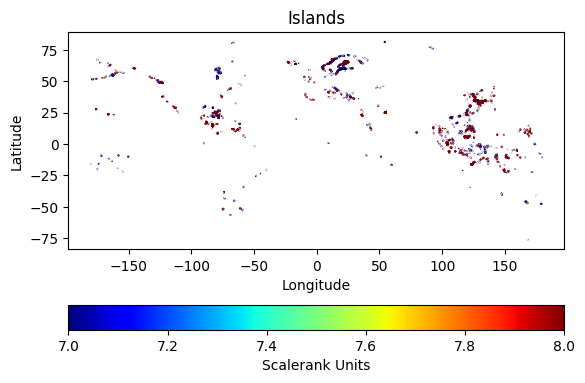

In [71]:
fig, ax = plt.subplots()
islands.plot(ax=ax, column="scalerank", cmap="jet")
plt.title("Islands")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
mappable = ax.collections[0]
cbar = fig.colorbar(mappable, ax=ax, orientation="horizontal")
cbar.set_label("Scalerank Units")
plt.show()

In [72]:
islands_repro = islands.to_crs('EPSG:3857') #change coordinate reference system

In [73]:
islands_repro.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

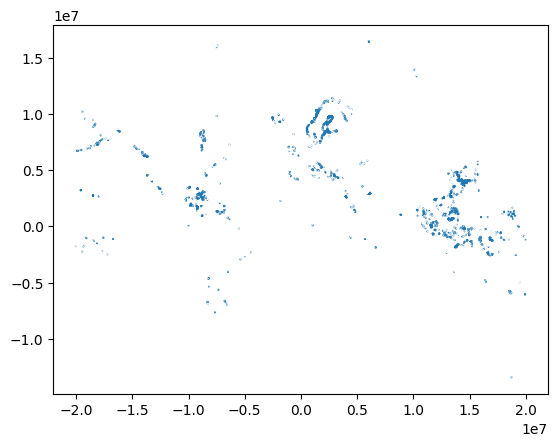

In [74]:
islands_repro.plot();

In [75]:
translated_islands = islands.translate(xoff=10, yoff=10) #geometrische transformationen, wichtig für GIS (vor allem in der Umwelt), translation um 10° in den Norden und den Osten
rotated_islands = islands.rotate(angle=30, origin='centroid')
scaled_islands = islands.scale(xfact=0.5, yfact=1.5, origin=(0, 0))

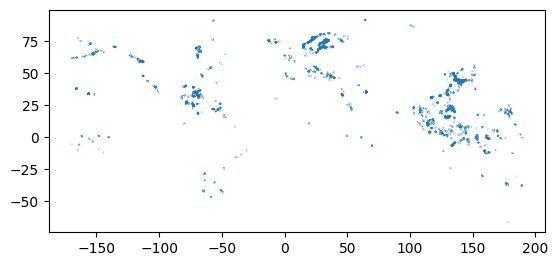

In [76]:
translated_islands.plot();
#die x und y achsen sind schon richtig, bloß wurde die Transformation anhand der originalen Shapes durchgeführt

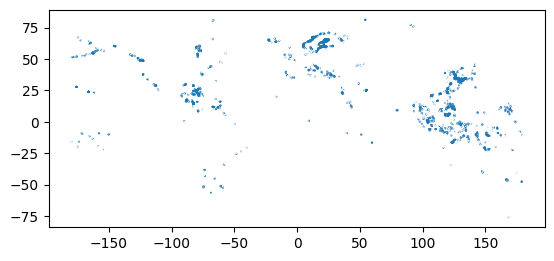

In [77]:
rotated_islands.plot();

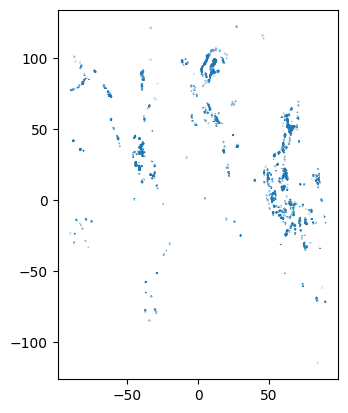

In [78]:
scaled_islands.plot();

Exercise 2: Plot the comparison btw the original islands (in blue) with the scaled islands (in red)

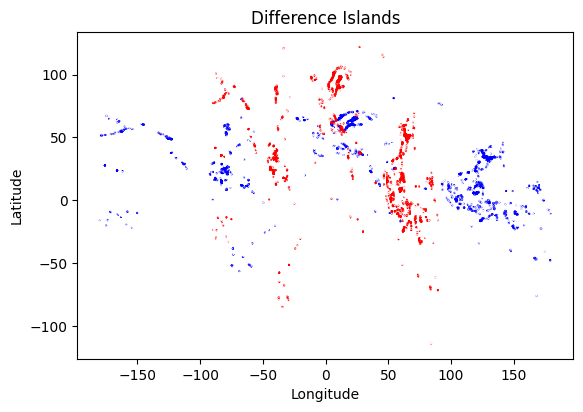

In [79]:
fig, ax = plt.subplots()
islands.plot(ax=ax, color="blue", label="Original Islands")
scaled_islands.plot(ax=ax, color="red", label="Scaled Islands")

plt.title("Difference Islands")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [80]:
## raster

In [81]:
ueb = rasterio.open('0.2_Ortho_Mosaik_Corrected_Final', 'r')
ueb

RasterioIOError: '0.2_Ortho_Mosaik_Corrected_Final' not recognized as a supported file format.

In [ ]:
rel = rasterio.open('SR_50M.tif', 'r') #r = readible mode (lesbarer modus, wenn "w". dann wird etwas gespeichert, geschrieben, unten, wenn wir was verändern (zB width, height, transform) schreiben wir die neue datei mit d in unseren Speicher
rel

In [ ]:
rel.name

In [ ]:
rel.meta
#affine: erste Nummer, Scale 
#zweite Nr.: rotation
#vierte zeile und sechste zeile minimum und maximum 
#dtype = unit8
#count = 1 = number of layers

In [ ]:
#10800/360 = 30 -> 1/30 = 0.03333333333333
#5400/180 = 30 -> 1/30 = 0.03333333333333 
#resolution of the Map (Affine)

In [ ]:
rel.count

In [ ]:
rel.height

In [ ]:
rel.width

In [ ]:
rel.crs

In [ ]:
rel.bounds

In [ ]:
show(rel);

In [ ]:
fig, ax = plt.subplots()
rel_new = ax.imshow(rel.read(1, masked=True), cmap='Spectral') #1 = der erste Layer wird geziegt, wenn mehr layer, zB 4, dann kann man mit "2" den zweiten plotten
fig.colorbar(rel_new, ax=ax, orientation='horizontal')
show(rel, ax=ax, cmap='Spectral');

In [95]:
meta = rel.meta
meta.update(height=3600) #hier verändert man die metadaten, hier height, danach width
meta.update(width=7200)
with rasterio.open('updated_raster.tif', 'w', **meta) as dst:
     dst.write(rel.read())
# ** 
# Block mit with und as
#in diesem Block wollen wir ein Dictionary ** aus Metadaten, die wir vorher ändern, neu schreiben in 'updated_raster.tif'

In [ ]:
dst = rasterio.open('updated_raster.tif', 'r')
dst

In [ ]:
dst.meta

In [ ]:
# 'transform': Affine(0.03333333333333, 0.0, -179.99999999999997, 0.0, -0.03333333333333, 90.0)} -> 0.03 ist die resolution, 0.0 bis -179 x-axis, 0.0 to 90.0 y-achsis
show(dst);

Exercise 3: modify the transform of the dst map to align it with the coordinate system of the rel file, which spans from -90 to 90 on the y-axis and -180 to 180 on the x-axis

In [ ]:
#In diesem Fall haben wir 7200 (width), das rechnen wir durch die 360 (-180 bis 180)und dievidieren das was rauskommt: 1/20 = 0.05
#das gleiche mit den 3600 und 180, da kommt auch 0.05

In [90]:
meta = dst.meta
meta.update(transform = (0.05, 0.0, -180, 0.0, -0.05, 90.0))
with rasterio.open('updatednewnew_raster.tif', 'w', **meta) as h:
    h.write(rel.read())

Exercise 4: modify the crs of the rel map to epsg(3857) (rasterio.crs is the function) and write the file to a new file.

In [82]:
# in den Metadaten steht folgendes: 'crs': CRS.from_epsg(4326), das wollen wir jetzt updaten

In [97]:
meta = rel.meta
meta.update(crs=rasterio.crs.CRS.from_epsg(3857))
with rasterio.open('updatednewnew_raster.tif', 'w', **meta) as g:
     g.write(rel.read())

AttributeError: 'str' object has no attribute 'CRS'

In [84]:
f = rasterio.open("updatednewnew_raster.tif")
f = f.read()

In [85]:
np.min(f)

52

In [86]:
np.max(f)

255

In [87]:
f.shape

(1, 5400, 10800)

In [88]:
f

array([[[204, 206, 206, ..., 206, 206, 204],
        [206, 206, 206, ..., 206, 206, 206],
        [206, 206, 206, ..., 206, 206, 206],
        ...,
        [206, 205, 205, ..., 206, 205, 206],
        [202, 202, 202, ..., 204, 203, 201],
        [197, 202, 201, ..., 201, 201, 198]]], dtype=uint8)

In [89]:
f = f / 10
f

array([[[20.4, 20.6, 20.6, ..., 20.6, 20.6, 20.4],
        [20.6, 20.6, 20.6, ..., 20.6, 20.6, 20.6],
        [20.6, 20.6, 20.6, ..., 20.6, 20.6, 20.6],
        ...,
        [20.6, 20.5, 20.5, ..., 20.6, 20.5, 20.6],
        [20.2, 20.2, 20.2, ..., 20.4, 20.3, 20.1],
        [19.7, 20.2, 20.1, ..., 20.1, 20.1, 19.8]]])

Exercise 5: plot the Relief map again and add the islands to your figure. Add colorbar and with a title

ValueError: 'Horizontal' is not a valid value for orientation; supported values are None, 'vertical', 'horizontal'

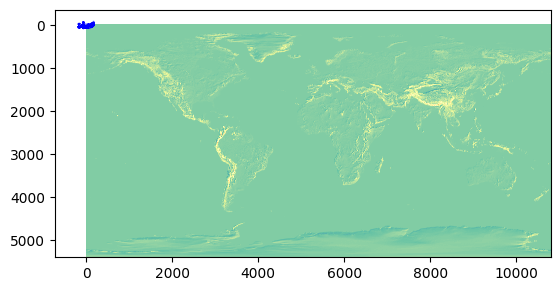

In [100]:
fig, ax= plt.subplots()
rel_new = ax.imshow(rel.read(1, masked = True), cmap = "Spectral"),
islands.plot(ax=ax, color="blue")
cbar = fig.colorbar(rel_new, ax=ax, orientation="Horizontal")
cbar.set_label("Elevation")
show(rel, ax = ax, cmap="Spectral");

Reference: https://jupyter.org https://the-turing-way.netlify.app/communication/binder/zero-to-binder.html https://docs.python.org https://geobgu.xyz/py/ https://www.naturalearthdata.com/

In [101]:
# für die Prüfung:

In [ ]:
# die Lecture vor der letzten Prüfung und die letzten beiden Lectures sind wichtig für die kommende Prüfung!